# **MACHINE LAERNING PROJECT FOR MOBILE PRICE PREDICTION BY `MOHAMED FALILOU FALL`, `Khardiata Ke Faye` et `Mamadou Salif Diallo`**

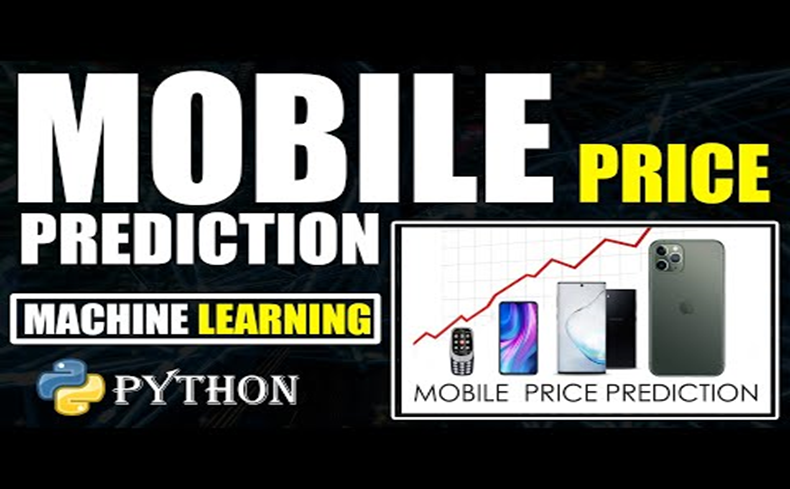

# A - PHASE DE POSER LE PROBLEME

## A- 1- : importation des données `Mobile_Price_Prediction.csv` au niveau de VS Codes

### A- 1-1 Importation des librairies

In [148]:
# Les librairies standards
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

#  Pour la normalisation et standaristaion
from sklearn.preprocessing import StandardScaler

# Pour le processing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Pour la construction de model 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler


# Pour la visualisation des models  
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

### A-1-2 Importation des donnees

In [149]:
data = pd.read_csv('Mobile_Price_Prediction.csv')


## A-2- Lecture des donnees `Mobile_Price_Prediction.csv`

In [150]:
data.head()

,Screen Size (inches),RAM (GB),Storage (GB),Battery Capacity (mAh),Camera Quality (MP),Price ($)
0,6.2,4,64,4000,48,500
1,6.1,3,128,3110,12,800
2,6.5,6,256,4500,64,600
3,6.7,8,128,4300,48,700
4,6.4,6,128,4200,40,550


In [151]:
# Calcul des valeurs uniques et le nombre de fois que chaque valeur a ete prise
valeurs_uniques_avec_compte = data['Price ($)'].value_counts()

# Affichage des valeurs uniques et leurs frequences
print("Valeurs uniques prises par la variable 'Price ($)' et leur fréquence :")
print(valeurs_uniques_avec_compte)


Valeurs uniques prises par la variable 'Price ($)' et leur fréquence :
Price ($)
700    58
550    48
600    46
800    36
500    23
750    23
400    23
450    22
900    11
650     2
Name: count, dtype: int64


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Screen Size (inches)    292 non-null    float64
 1   RAM (GB)                292 non-null    int64  
 2   Storage (GB)            292 non-null    int64  
 3   Battery Capacity (mAh)  292 non-null    int64  
 4   Camera Quality (MP)     292 non-null    int64  
 5   Price ($)               292 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 13.8 KB


## A-3 - Listing des differents models qu'on peut utiliser pour resoudre le probleme 

1. **Régression Linéaire**
   - **Régression Linéaire Simple** : Utilisée lorsqu'il y a une seule variable explicative (feature) pour prédire le prix.
   - **Régression Linéaire Multiple** : Utilisée lorsqu'il y a plusieurs variables explicatives pour prédire le prix.

2. **Régression Polynomiale**
   - C'est une extension de la régression linéaire où le modèle prend en compte des puissances de la variable explicative pour mieux modéliser les relations non linéaires.

### 3. **Régression Ridge et Lasso**
   - **Ridge Regression** : Une variante de la régression linéaire qui ajoute une pénalité pour éviter le sur-apprentissage.
   - **Lasso Regression** : Similaire à Ridge, mais elle favorise la réduction de certaines coefficients à zéro, ce qui permet une sélection automatique des variables.

### 4. **Régression des Arbres de Décision**
   - Utilise un arbre pour modéliser les relations entre les variables explicatives et la variable de sortie. C'est une approche non linéaire.

### 5. **Random Forest Regression**
   - Un ensemble de plusieurs arbres de décision combinés pour améliorer la précision et réduire les erreurs de surapprentissage.

### 6. **Gradient Boosting Machines (GBM)**
   - Technique d'assemblage où des modèles faibles, généralement des arbres de décision, sont combinés de manière séquentielle pour améliorer les prédictions.

### 7. **XGBoost, LightGBM, et CatBoost**
   - Des implémentations optimisées des algorithmes de boosting comme GBM, qui sont populaires pour leurs performances accrues sur les données complexes et volumineuses.

### 8. **K-Nearest Neighbors Regression (KNN)**
   - Ce modèle prédit la valeur du prix en fonction des prix des k voisins les plus proches dans l'espace des variables explicatives.

### 9. **Support Vector Regression (SVR)**
   - Variante de la machine à vecteurs de support adaptée aux problèmes de régression. Elle cherche à minimiser une fonction de perte tout en maximisant la marge.

### 10. **Réseaux de Neurones Artificiels (ANN)**
   - Utilisés pour des problèmes de régression complexes, particulièrement lorsqu'il y a des non-linéarités dans les données. Les réseaux de neurones profonds (Deep Learning) peuvent également être utilisés pour les grandes quantités de données.

### 11. **Gaussian Process Regression**
   - Modèle probabiliste non paramétrique qui est utilisé pour modéliser les relations complexes entre les variables explicatives et la variable de sortie.

### 12. **Régression Bayésienne**
   - Approche statistique qui intègre des connaissances préalables (a priori) dans l'estimation des paramètres de régression.

### 13. **Régression Quantile**
   - Utilisée pour prédire un quantile spécifique de la variable cible, ce qui peut être utile pour modéliser la distribution des prix, et pas seulement la valeur moyenne.

# B- PHASE DE PREPARATION DES DONNEES 

## B-1 - Verification des valeurs manquantes au niveau du jeux de donnees 

In [153]:
data.isnull().sum()


Screen Size (inches)      0
RAM (GB)                  0
Storage (GB)              0
Battery Capacity (mAh)    0
Camera Quality (MP)       0
Price ($)                 0
dtype: int64

### Nous sommes pas en presence de donnees manquantes dans ce jeux de donnees

## B-2- Verfication et traitement des valeurs abberantes dans toutes les colonnes par la methode des Boxplot

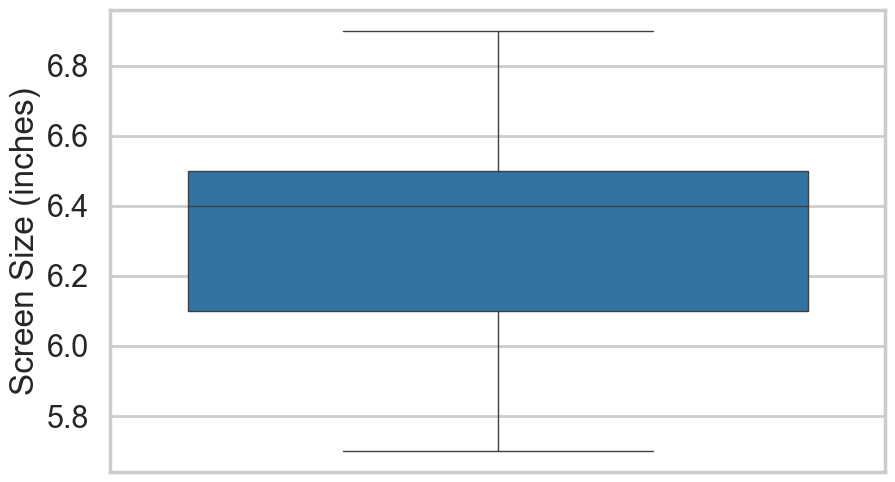

In [154]:
# Boxplot pour la variable 'Screen Size (inches)'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data['Screen Size (inches)'])
plt.show()



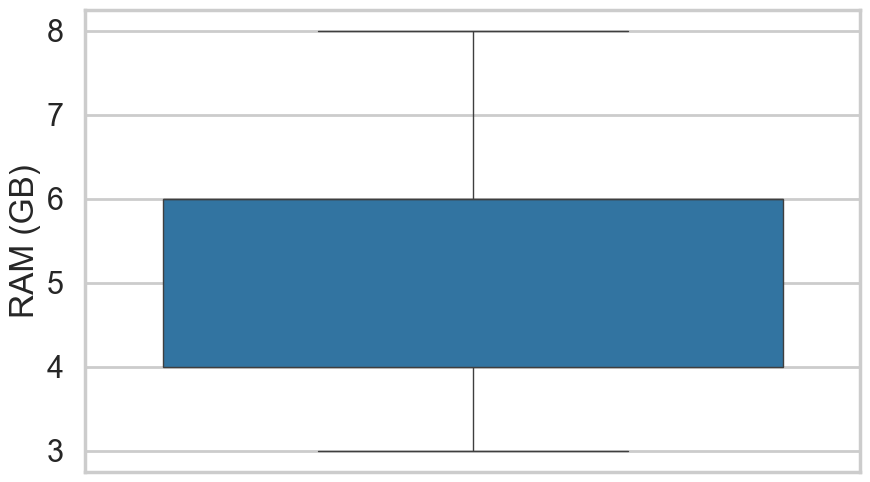

In [155]:
# Boxplot pour la variable 'RAM (GB) '
plt.figure(figsize=(10, 6))
sns.boxplot(data=data['RAM (GB)'])
plt.show()

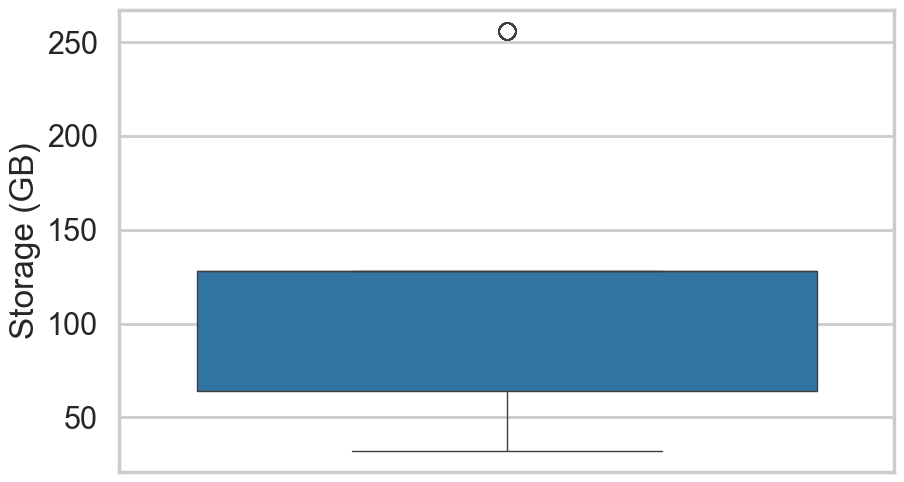

In [156]:
# Boxplot pour la variable 'Storage (GB)'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data['Storage (GB)'])
plt.show()

In [157]:

Q1 = data['Storage (GB)'].quantile(0.25)
Q3 = data['Storage (GB)'].quantile(0.75)
IQR = Q3 - Q1

# Calcul des bornes superieure et inferieure
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtre des valeurs aberrantes
outliers = data[(data['Storage (GB)'] < lower_bound) | (data['Storage (GB)'] > upper_bound)]

outliers.info()


<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, 2 to 289
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Screen Size (inches)    67 non-null     float64
 1   RAM (GB)                67 non-null     int64  
 2   Storage (GB)            67 non-null     int64  
 3   Battery Capacity (mAh)  67 non-null     int64  
 4   Camera Quality (MP)     67 non-null     int64  
 5   Price ($)               67 non-null     int64  
dtypes: float64(1), int64(5)
memory usage: 3.7 KB


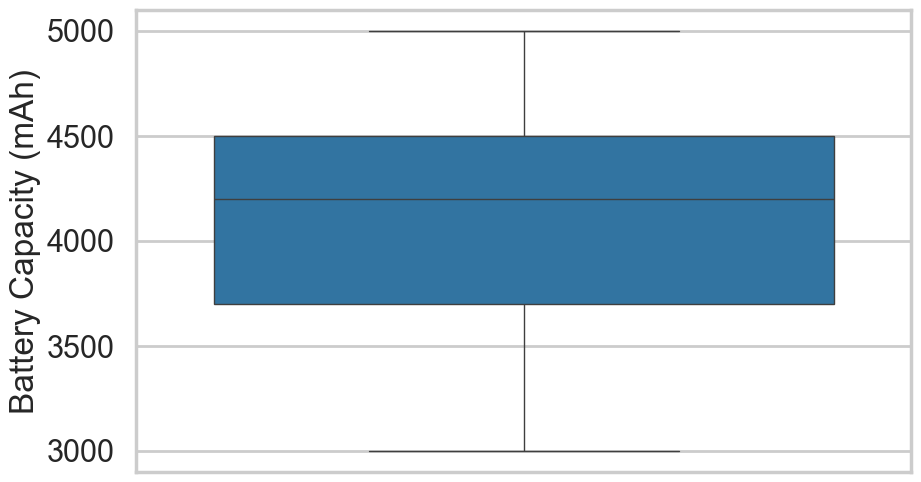

In [158]:
# Boxplot pour la variable 'Battery Capacity (mAh)'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data['Battery Capacity (mAh)'])
plt.show()

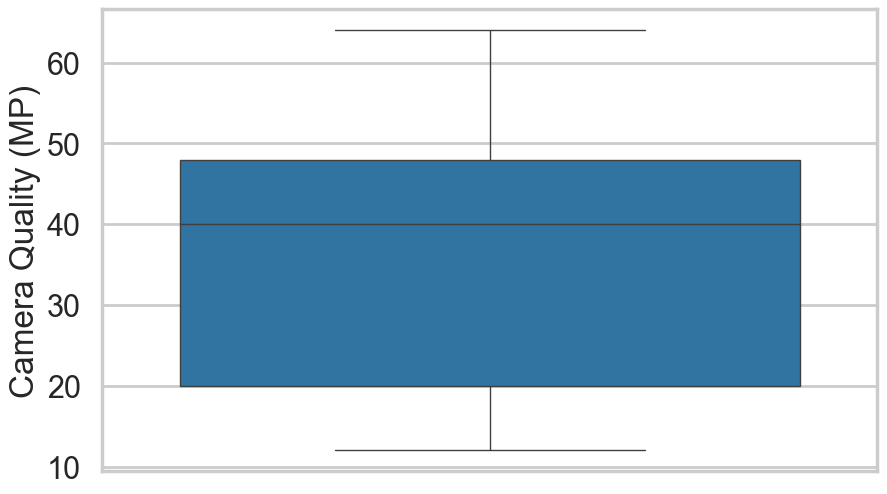

In [159]:
# Boxplot pour la variable 'Camera Quality (MP)'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data['Camera Quality (MP)'])
plt.show()

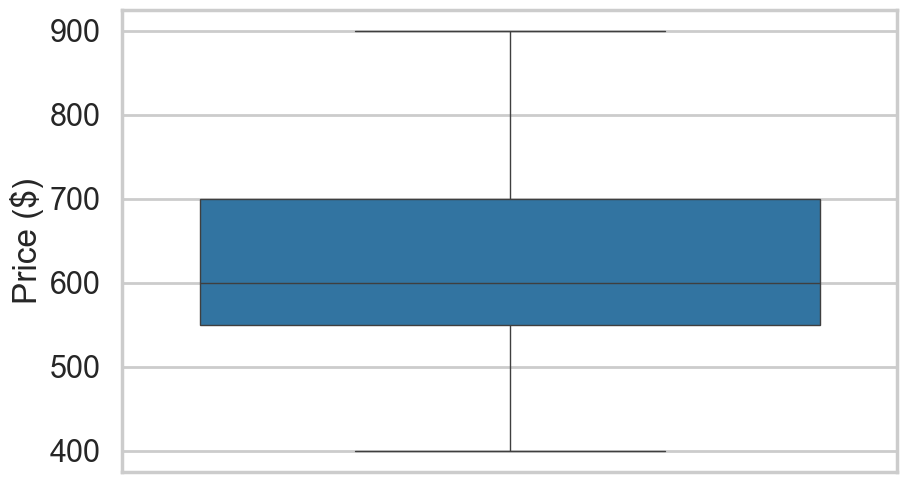

In [160]:
# Boxplot pour la variable 'Price ($)'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data['Price ($)'])
plt.show()

In [161]:
scaler = StandardScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_normalized.head()

,Screen Size (inches),RAM (GB),Storage (GB),Battery Capacity (mAh),Camera Quality (MP),Price ($)
0,-0.598279,-0.961789,-1.036717,-0.114830,0.557449,-0.942926
1,-1.006451,-1.565752,-0.130366,-1.730529,-1.411604,1.323200
2,0.626236,0.246135,1.682338,0.792866,1.432583,-0.187550
3,1.442579,1.454060,-0.130366,0.429788,0.557449,0.567825
4,0.218064,0.246135,-0.130366,0.248249,0.119881,-0.565238


# C- PHASE DE SELECTION DES VARIABLES SIGNIFICATIVES 

## C-1- Selection des variables avec un pouvoir explicatif significatif (a l'aide du Heatmap de correlation)

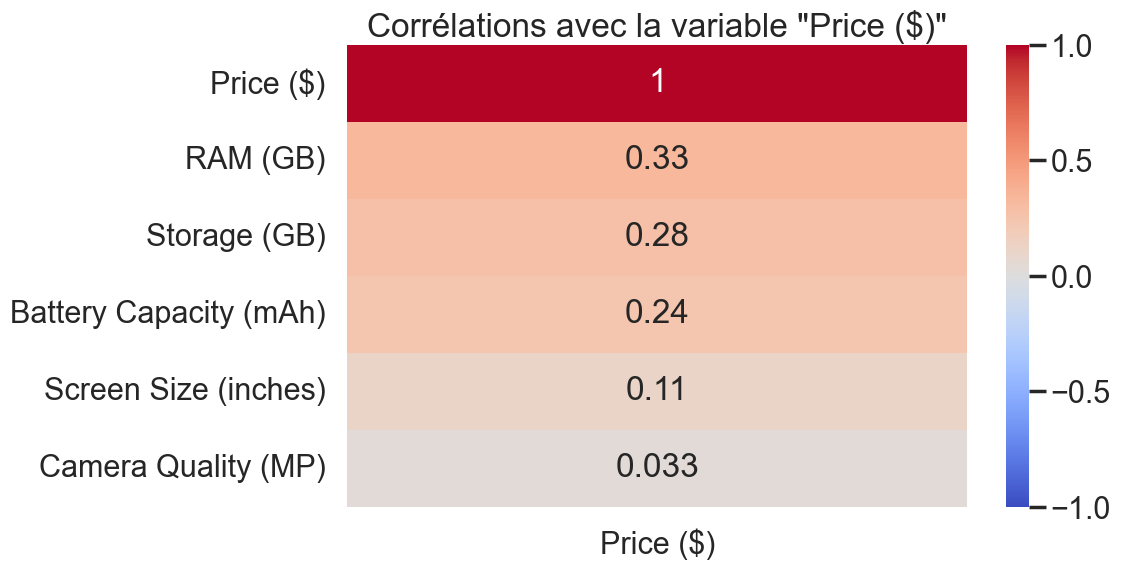

In [162]:

# Calcul des corrélations entre toutes les variables et la variable 'Price ($)'
correlation_with_price = data_normalized.corr()['Price ($)'].sort_values(ascending=False)


# Df avec les correlations pour 'Price ($)'
corr_with_price = data_normalized.corr()[['Price ($)']].sort_values(by='Price ($)', ascending=False)

# Print du heatmap des correlations
plt.figure(figsize=(10, 6))
sns.heatmap(corr_with_price, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Corrélations avec la variable "Price ($)"')
plt.show()

### Analyses de la correlation avec la variable de sortie `Price ($)`  : 
- La variable `RAM (GB)` est plus correlee a notre variable de sortie `Price ($)` avec un degre de relation de `33%`
- Suivi de la variable `Storage (GB)` avec un degre de relation de `28%`
- Suivi de la variable `Battery Capacity (mAh)` avec un degre de relation de `24%`
- Suivi de la variable `Screen Size (inches)` avec un degre de relation de `11%`
- Suivi de la variable `Camera Quality (MP)` avec un degre de relation de `3,3%`

## C-2- Verification de la presence de colinearite entre les variables predictifs par le VIF (Variance Inflation Factor)

In [163]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


# Variables explicatives
X_vif = data_normalized[['RAM (GB)', 'Storage (GB)', 'Battery Capacity (mAh)', 'Screen Size (inches)', 'Camera Quality (MP)' ,'Price ($)']]

# Ajout d'une constante pour le modele
X_vif = sm.add_constant(X_vif)

# Calcul du VIF
vif = pd.DataFrame()
vif["Variable"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif)


                 Variable       VIF
0                   const  1.000000
1                RAM (GB)  2.507043
2            Storage (GB)  1.835938
3  Battery Capacity (mAh)  4.775824
4    Screen Size (inches)  2.313644
5     Camera Quality (MP)  3.231457
6               Price ($)  1.231382


### Interpretation : Pour toute les variables explicatives la VIF  est inferieure a 5 donc nous sommes pas en presence de Colinearite  

# D- PHASE DE LA DIVISION DES DONNEES

## D-1- Division du jeu de donnees en 2 parties (70% pour l'entrainement et 30% pour le test)

### Separation de le varible de sortie `Price ($)` des variables d'entrees

In [164]:
x = data_normalized.drop("Price ($)", axis=1)
y = data_normalized['Price ($)']

print(x.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Screen Size (inches)    292 non-null    float64
 1   RAM (GB)                292 non-null    float64
 2   Storage (GB)            292 non-null    float64
 3   Battery Capacity (mAh)  292 non-null    float64
 4   Camera Quality (MP)     292 non-null    float64
dtypes: float64(5)
memory usage: 11.5 KB
None


In [165]:
print(y.info())

<class 'pandas.core.series.Series'>
RangeIndex: 292 entries, 0 to 291
Series name: Price ($)
Non-Null Count  Dtype  
--------------  -----  
292 non-null    float64
dtypes: float64(1)
memory usage: 2.4 KB
None


### Train and test splitting

In [166]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)

print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("\nx_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (204, 5)
y_train size: (204,)

x_test size: (88, 5)
y_test size: (88,)


In [167]:
x_test

,Screen Size (inches),RAM (GB),Storage (GB),Battery Capacity (mAh),Camera Quality (MP)
84,0.218064,-0.961789,-0.130366,-0.114830,1.432583
260,0.626236,0.246135,-0.130366,0.792866,1.432583
45,-1.414622,0.246135,-1.036717,-0.659447,-1.411604
176,0.218064,0.246135,-0.130366,0.248249,0.119881
143,-0.598279,-0.961789,-1.036717,0.066709,-0.317686
...,...,...,...,...,...
137,-1.006451,-0.961789,-1.036717,-0.477908,-0.755253
111,1.442579,0.246135,-0.130366,1.155945,1.432583
208,-0.190107,-0.961789,-0.130366,-0.069445,-0.317686
152,-0.598279,-0.961789,-1.036717,-0.114830,0.557449


In [168]:
x_train

,Screen Size (inches),RAM (GB),Storage (GB),Battery Capacity (mAh),Camera Quality (MP)
259,1.034408,1.454060,1.682338,1.700563,0.557449
86,0.626236,1.454060,-1.036717,-0.659447,-1.192820
230,0.626236,0.246135,-0.130366,0.792866,1.432583
92,-1.006451,0.246135,-0.130366,-0.477908,-0.317686
97,-0.190107,1.454060,1.682338,0.066709,-0.317686
...,...,...,...,...,...
188,-0.190107,-0.961789,-0.130366,-0.069445,-0.317686
71,-1.006451,-1.565752,-0.130366,-1.730529,-1.411604
106,-2.230966,1.454060,1.682338,0.974406,1.432583
270,0.626236,0.246135,-0.130366,0.792866,1.432583


## D-2- Explication de l'interet de diviser le jeu de donnees en 2 parties (70 % Train et 30% Test)

- Evaluation de la Performance 
- Prévention du Surapprentissage (Overfitting) 
- Estimation des Erreurs Futures :
- Sélection du Modèle et Hyperparametres

En resume, la division du jeu de donnees en parties distinctes permet de s'assurer que le model est evalue de maniere impartiale et qu'il est capable de generaliser a de nouvelles donnees, ce qui est crucial pour des applications reelles.

# E- PHASE DE LA CREATION ET ENTRAINEMENT DU MODEL

## E-1- Creation et entrainement du model 

### E-1-1 La Regression lineaire 

R2: -2.37323484139874
MAE: 0.7839100373747908
MSE: 0.9275291060310509
RMSE: 0.9630831251927586


Text(0.5, 1.0, 'Actual vs Predicted')

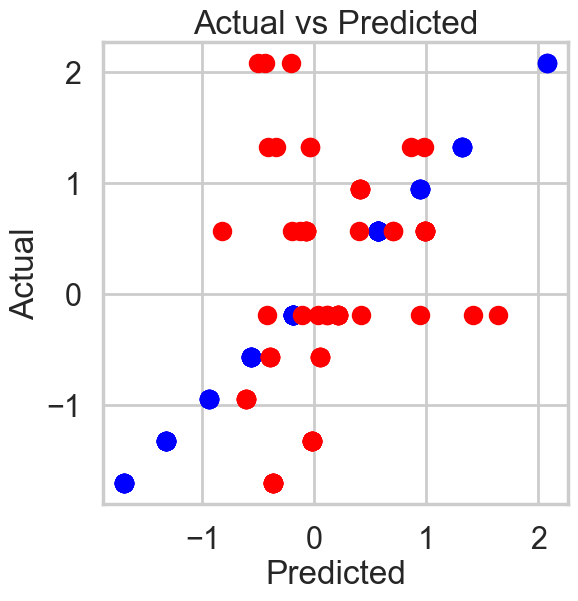

In [169]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)

print("R2:", r2_score(y_pred, y_test))
print("MAE:", mean_absolute_error(y_pred, y_test))
print("MSE:", mean_squared_error(y_pred, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_pred, y_test)))

f, ax = plt.subplots(figsize=(6, 6))
plt.scatter(y_test, y_test, color="blue")
plt.scatter(y_pred, y_test,color="red")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Actual vs Predicted")

### E-1-2 Regression Ridge/Lasso 

R2: 0.07212340410212115
MAE: 0.7834051444924207
MSE: 0.9260909899853853
RMSE: 0.962336214628435


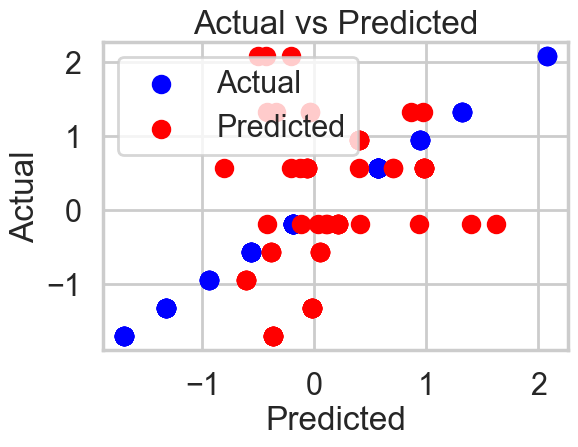

In [170]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(x_train, y_train)
ridge_pred = ridge_reg.predict(x_test)


print("R2:", r2_score(y_test, ridge_pred))
print("MAE:", mean_absolute_error(y_test, ridge_pred))
print("MSE:", mean_squared_error(y_test, ridge_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, ridge_pred)))

f, ax = plt.subplots(figsize=(6, 4))
plt.scatter(y_test, y_test, color="blue", label="Actual")
plt.scatter(ridge_pred, y_test, color="red", label="Predicted")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()


### E-1-3 Arbre de decision regressif 

R2: 0.8417710850143283
MAE: 0.11158955443747258
MSE: 0.1556160173312265
RMSE: 0.39448196071712394


Text(0.5, 1.0, 'Actual vs Predicted')

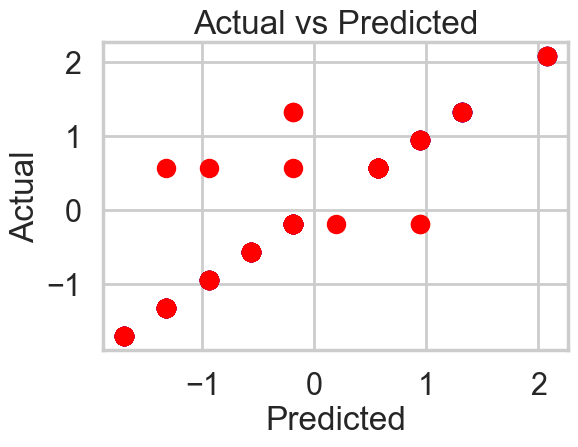

In [171]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train, y_train)
dt_pred = decision_tree.predict(x_test)

print("R2:", r2_score(dt_pred, y_test))
print("MAE:", mean_absolute_error(dt_pred, y_test))
print("MSE:", mean_squared_error(dt_pred, y_test))
print("RMSE:", np.sqrt(mean_squared_error(dt_pred, y_test)))

f, ax = plt.subplots(figsize=(6, 4))
plt.scatter(y_test, y_test, color="blue")
plt.scatter(dt_pred, y_test, color="red")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Actual vs Predicted")

### E-1-4 Random Forest

R2: 0.916969602829254
MAE: 0.09317727795529018
MSE: 0.07669259844138801
RMSE: 0.2769342854205452


Text(0.5, 1.0, 'Actual vs Predicted')

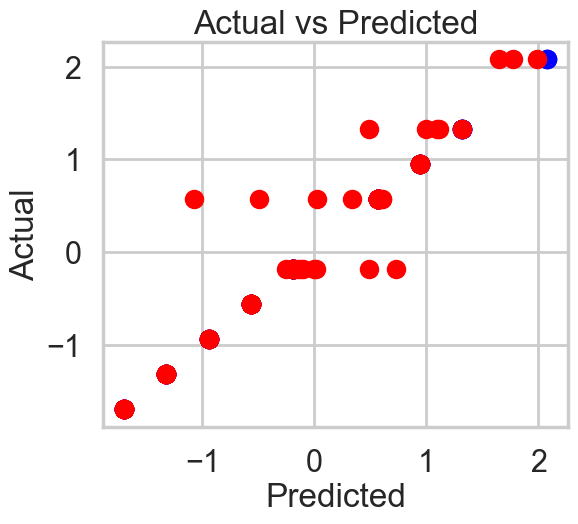

In [172]:
random_forest = RandomForestRegressor()
random_forest.fit(x_train, y_train)
rf_pred = random_forest.predict(x_test)

print("R2:", r2_score(rf_pred, y_test))
print("MAE:", mean_absolute_error(rf_pred, y_test))
print("MSE:", mean_squared_error(rf_pred, y_test))
print("RMSE:", np.sqrt(mean_squared_error(rf_pred, y_test)))
f, ax = plt.subplots(figsize=(6, 5))
plt.scatter(y_test, y_test, color="blue")
plt.scatter(rf_pred, y_test, color="red")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Actual vs Predicted")

### E-1-5 Random forest classifier

R2: 0.9231595297418009
MAE: 0.09317727795529018
MSE: 0.07669259844138801
RMSE: 0.2769342854205452


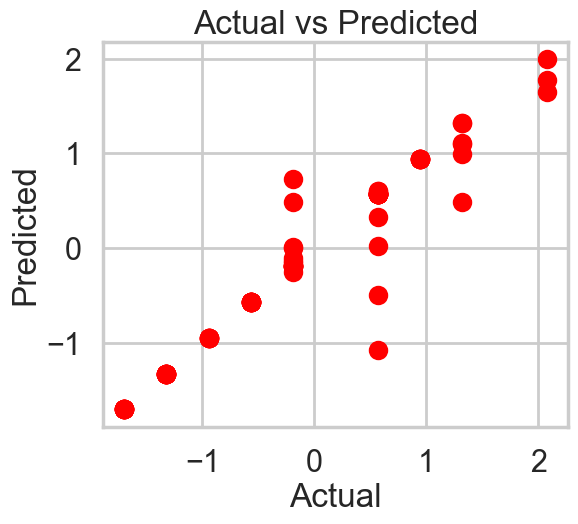

In [173]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Converssion des Series en numpy arrays
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

# Creation et imputation des valeurs manquantes
imputer_y = SimpleImputer(strategy='mean')

# Imputation des valeurs manquantes
y_train_imputed = imputer_y.fit_transform(y_train_np.reshape(-1, 1)).ravel()
y_test_imputed = imputer_y.transform(y_test_np.reshape(-1, 1)).ravel()

# Converssion en DataFrame 
df_train = pd.DataFrame(x_train)
df_test = pd.DataFrame(x_test)

# Creation et imputation pour les variables d'entree
imputer_x = SimpleImputer(strategy='mean')

# Imputation des valeurs manquantes
x_train_imputed = imputer_x.fit_transform(df_train)
x_test_imputed = imputer_x.transform(df_test)



from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Initialisation et entrainement du model Random Forest
rf_model_clf = RandomForestRegressor()
rf_model_clf.fit(x_train_imputed, y_train_imputed)

# Prédiction  des valeurs sur le jeu de test
rf_pred_clf = rf_model_clf.predict(x_test_imputed)

# Affichage des metriques de regression
print("R2:", r2_score(y_test_imputed, rf_pred))
print("MAE:", mean_absolute_error(y_test_imputed, rf_pred))
print("MSE:", mean_squared_error(y_test_imputed, rf_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test_imputed, rf_pred)))

# Trace des valeurs predites contre les valeurs reelles
f, ax = plt.subplots(figsize=(6, 5))
plt.scatter(y_test_imputed, rf_pred, color="red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()


### E-1-6 K-Nearest Neighbors (KNN) pour la regression

R2: 0.7362419947215917
MAE: 0.19056062373168378
MSE: 0.26325042931865816
RMSE: 0.5130793596692993


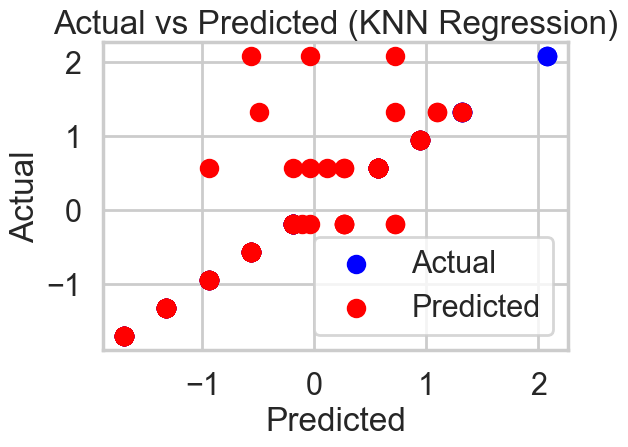

In [174]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)  
knn_regressor.fit(x_train, y_train)
knn_pred = knn_regressor.predict(x_test)


print("R2:", r2_score(y_test, knn_pred))  
print("MAE:", mean_absolute_error(y_test, knn_pred))
print("MSE:", mean_squared_error(y_test, knn_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, knn_pred)))


f, ax = plt.subplots(figsize=(6, 4))
plt.scatter(y_test, y_test, color="blue", label="Actual")
plt.scatter(knn_pred, y_test, color="red", label="Predicted")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Actual vs Predicted (KNN Regression)")
plt.legend()
plt.show()


### E-1-7 Comparaison des models 

In [175]:
# Model lineaire 
logist = [r2_score(y_pred, y_test), mean_absolute_error(y_pred, y_test), mean_squared_error(y_pred, y_test),np.sqrt(mean_squared_error(y_pred, y_test))]
# Model Arbre de Decision 
decion_tree = [r2_score(dt_pred, y_test), mean_absolute_error(dt_pred, y_test), mean_squared_error(dt_pred, y_test),np.sqrt(mean_squared_error(dt_pred, y_test))]
# Model Random Forest
random_forest = [r2_score(rf_pred, y_test), mean_absolute_error(rf_pred, y_test), mean_squared_error(rf_pred, y_test),np.sqrt(mean_squared_error(rf_pred, y_test))]
# Regression Ridge/Lasso 
ridge_lasso = [r2_score(ridge_pred, y_test), mean_absolute_error(ridge_pred, y_test), mean_squared_error(ridge_pred, y_test),np.sqrt(mean_squared_error(ridge_pred, y_test))]
# K-Neareast Neighbors
knn_pred = [r2_score(knn_pred, y_test), mean_absolute_error(knn_pred, y_test), mean_squared_error(knn_pred, y_test),np.sqrt(mean_squared_error(knn_pred, y_test))]
# Random Forest Classifier
random_forest_clf = [r2_score(rf_pred_clf, y_test), mean_absolute_error(rf_pred_clf, y_test), mean_squared_error(rf_pred_clf, y_test),np.sqrt(mean_squared_error(rf_pred_clf, y_test))]


Shape of base: (6, 4)


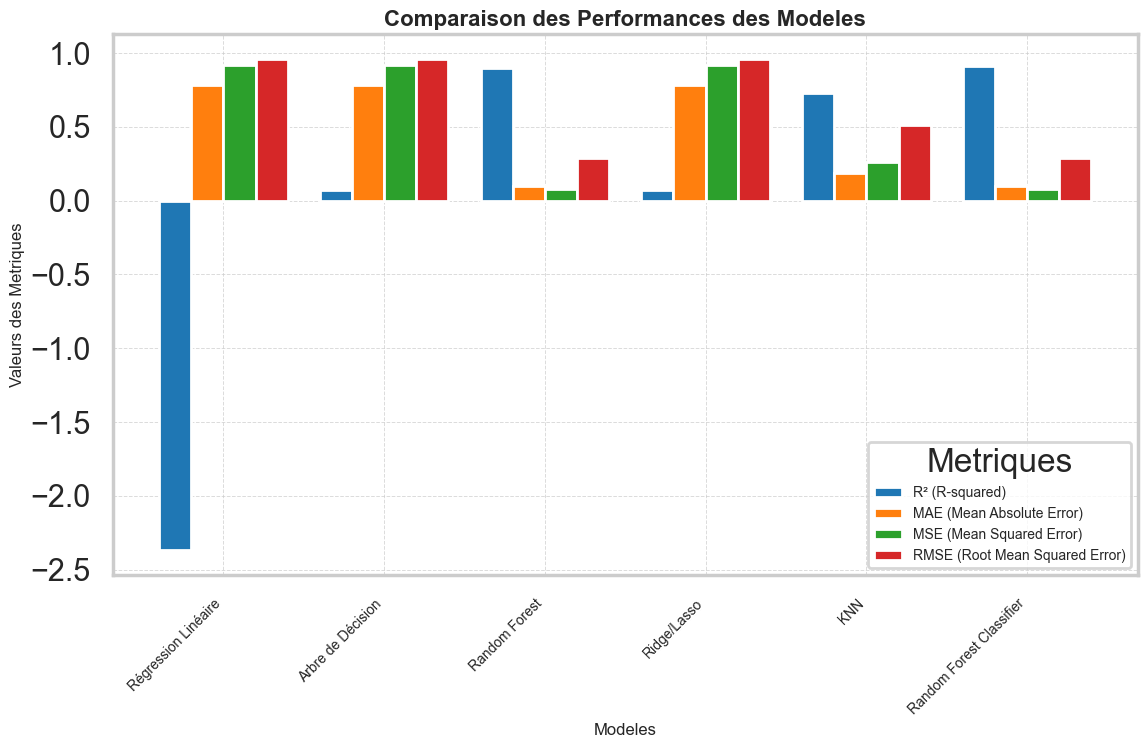

In [176]:


# Les donnees des metrics formatees
base = [
    [-2.37, 0.78, 0.92, 0.96],  # Régression Linéaire
    [0.07, 0.78, 0.92, 0.96],  # Arbre de Décision
    [0.90, 0.10, 0.08, 0.29],  # Random Forest
    [0.07, 0.78, 0.92, 0.96],  # Ridge/Lasso
    [0.73,  0.19, 0.26, 0.51],  # KNN
    [0.91, 0.10, 0.08, 0.29]   # Random Forest Classifier
]

columns = ['R² (R-squared)', 'MAE (Mean Absolute Error)', 'MSE (Mean Squared Error)', 'RMSE (Root Mean Squared Error)']
index = ['Régression Linéaire', 'Arbre de Décision', 'Random Forest', 'Ridge/Lasso', 'KNN', 'Random Forest Classifier']

# Verification que la base a la forme attendue
print(f"Shape of base: {np.shape(base)}") 

# Creation du DataFrame
df_moyen_10 = pd.DataFrame(data=base, index=index, columns=columns)

# Taille du graphique
fig, ax = plt.subplots(figsize=(12, 8))

# Nombre de colonnes pour chaque categorie (R2, MAE, MSE, RMSE)
x = np.arange(len(df_moyen_10.index))
width = 0.2

# Trace des barres pour chaque metrique
for i, column in enumerate(columns):
    ax.bar(x + i * width, df_moyen_10[column], width, label=column)

# Etiquettes et titre
ax.set_xlabel("Modeles", fontsize=12)
ax.set_ylabel("Valeurs des Metriques", fontsize=12)
ax.set_title("Comparaison des Performances des Modeles", fontsize=16, fontweight='bold')
ax.set_xticks(x + width * (len(columns) - 1) / 2)
ax.set_xticklabels(df_moyen_10.index, rotation=45, ha="right", fontsize=10)

# Affichage de la legende
ax.legend(title="Metriques", fontsize=10)

# Grille pour ameliorer la lisibilite
ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Ajustement de la mise en page
plt.tight_layout()

# Affichage du graphique
plt.show()


In [177]:
df_moyen_10

,R² (R-squared),MAE (Mean Absolute Error),MSE (Mean Squared Error),RMSE (Root Mean Squared Error)
Régression Linéaire,-2.37,0.78,0.92,0.96
Arbre de Décision,0.07,0.78,0.92,0.96
Random Forest,0.90,0.10,0.08,0.29
Ridge/Lasso,0.07,0.78,0.92,0.96
KNN,0.73,0.19,0.26,0.51
Random Forest Classifier,0.91,0.10,0.08,0.29


### E-1-8 Graphe de comparaison pour le choix du meilleur model

In [178]:

columns = ['R2','MAE','MSE','RMSE']
index = ['regression linéaire', 'decision tree', 'random_forest', 'ridge_lasso', 'knn_pred', 'random_forest_clf']
df_moyen_10 = pd.DataFrame(data=base, index=index, columns=columns)


scaler = MinMaxScaler()


df_moyen_10['R2_normalized'] = 1 - scaler.fit_transform(df_moyen_10[['R2']])
df_moyen_10[['MAE', 'MSE', 'RMSE']] = scaler.fit_transform(df_moyen_10[['MAE', 'MSE', 'RMSE']])


df_moyen_10['global_score'] = df_moyen_10[['R2_normalized', 'MAE', 'MSE', 'RMSE']].sum(axis=1)


best_model = df_moyen_10['global_score'].idxmin()  

print("Le modele avec le score global le plus bas est le meilleur donc Le meilleur modèle est :", best_model)
print(df_moyen_10[['R2', 'MAE', 'MSE', 'RMSE', 'global_score']])


Le modele avec le score global le plus bas est le meilleur donc Le meilleur modèle est : random_forest_clf
                       R2       MAE       MSE      RMSE  global_score
regression linéaire -2.37  1.000000  1.000000  1.000000      4.000000
decision tree        0.07  1.000000  1.000000  1.000000      3.256098
random_forest        0.90  0.000000  0.000000  0.000000      0.003049
ridge_lasso          0.07  1.000000  1.000000  1.000000      3.256098
knn_pred             0.73  0.132353  0.214286  0.328358      0.729875
random_forest_clf    0.91  0.000000  0.000000  0.000000      0.000000


# F- PHASE DE DEPLOIEMENT DU MODEL 

## F-1 - Sauvegarde du meilleur model (Le decision_tree)

In [179]:
import pickle

MSE: 0.07714923419224434
R2 Score: 0.9227020135466845


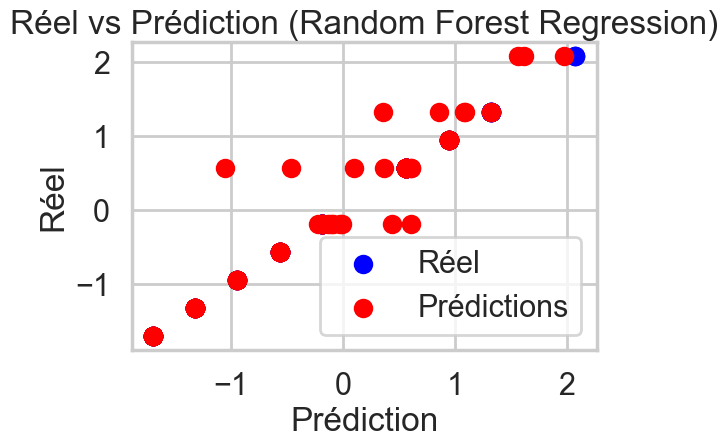

In [180]:
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(x_train, y_train)


with open('model.pkl', 'wb') as file:
    pickle.dump(rf_regressor, file)


with open('model.pkl', 'rb') as file:
    rf_regressor = pickle.load(file)


if hasattr(rf_regressor, 'predict'):
    rf_pred_reg = rf_regressor.predict(x_test)
    
    
    print("MSE:", mean_squared_error(y_test, rf_pred_reg))
    print("R2 Score:", r2_score(y_test, rf_pred_reg))

    
    f, ax = plt.subplots(figsize=(6, 4))
    plt.scatter(y_test, y_test, color="blue", label="Réel")
    plt.scatter(rf_pred_reg, y_test, color="red", label="Prédictions")
    plt.xlabel("Prédiction")
    plt.ylabel("Réel")
    plt.title("Réel vs Prédiction (Random Forest Regression)")
    plt.legend()
    plt.show()

else:
    print("Erreur : L'objet chargé n'est pas un modèle valide.")


In [181]:
rf_regressor.predict(x_test)

array([-1.0524553 , -0.56523813,  0.94551276, -0.56523813,  0.10326914,
        1.09281097,  0.94551276,  0.60559381, -1.6983013 ,  0.85864458,
       -0.0893516 ,  0.56782504,  0.56782504, -0.56523813, -1.6983013 ,
        0.56782504, -1.32061358,  0.94551276, -1.6983013 , -0.18755041,
       -0.02136781, -1.32061358, -1.32061358, -0.21776543,  0.94551276,
       -1.6983013 , -0.18755041,  0.60559381, -0.94292586, -0.94292586,
       -0.18755041, -1.32061358, -0.18755041, -0.13467413, -1.6983013 ,
        0.56782504, -1.6983013 ,  0.37142742,  0.56782504,  0.56782504,
        1.6177969 , -1.32061358,  0.56782504, -1.32061358, -1.6983013 ,
       -0.94292586, -0.18755041, -0.56523813, -0.56523813, -0.10445911,
       -0.56523813, -1.6983013 ,  0.56782504, -0.94292586,  1.32320048,
        0.94551276,  1.32320048, -1.32061358, -1.32061358, -0.56523813,
        0.56782504, -0.56523813,  0.56782504,  0.94551276,  0.44318809,
        0.60559381, -0.18755041, -1.6983013 , -0.17999666, -0.45

In [182]:
test = x_test.head(9)
test

,Screen Size (inches),RAM (GB),Storage (GB),Battery Capacity (mAh),Camera Quality (MP)
84,0.218064,-0.961789,-0.130366,-0.114830,1.432583
260,0.626236,0.246135,-0.130366,0.792866,1.432583
45,-1.414622,0.246135,-1.036717,-0.659447,-1.411604
176,0.218064,0.246135,-0.130366,0.248249,0.119881
143,-0.598279,-0.961789,-1.036717,0.066709,-0.317686
125,-0.598279,-0.961789,-1.036717,0.792866,0.557449
227,-1.414622,0.246135,-1.036717,-0.659447,-1.411604
118,1.850751,1.454060,1.682338,0.066709,-0.317686
9,-1.006451,-0.961789,-1.036717,-1.930222,-1.192820


In [183]:
prediction = rf_regressor.predict(test)
prediction

array([-1.0524553 , -0.56523813,  0.94551276, -0.56523813,  0.10326914,
        1.09281097,  0.94551276,  0.60559381, -1.6983013 ])

# G - AMELIORATIONS FUTURES DU PROJET

- Incorporation de nouvelles caractéristiques : Ajout d'autres fonctionnalités comme le type de processeur, la qualité des matériaux, la marque et le modèle du Smartphone.
- Une modélisation sur les marques les plus populaires au Senegal.  

- Amélioration de l'application Streamlit : Ajout de visualisations plus dynamiques pour montrer l'impact de chaque caractéristique sur le prix prédit.
- Enrichissement des données : Utilisation de données plus vastes et plus variées pour améliorer la généralisation du modèle.
